=== Handle imports and paths ===

In [2]:
import sys
sys.path.append('/mnt/md0/tempFolder/samAnderson/gnn_model/unet-gnn/functions/') 
from paths_and_imports import *
from control_flow_functions import *
%load_ext autoreload
%autoreload 2

=== Load the trained model ===

In [2]:
trained_model = get_gnn(fs=feature_scale, dropout_levels=dropout_levels, 
                           pooling_path=pooling_path, ico_levels=ico_levels)    
trained_model.load_state_dict(torch.load(f'{output_dir}trained_weights.pth'))

<All keys matched successfully>

=== Test the trained model on the sex-masked sets ===

Males

MAE (L1) Loss: 7.811 across 558 observations
Variance and MAE Loss: 112.451 across 558 observations


Saved Figure: /mnt/md0/tempFolder/samAnderson/gnn_model/unet-gnn/last_model_outputs/test_m_raw_age_gaps.png
Figure stats: mean = -2.2634504618740885 ; median = -1.8592351192546772 ; std = 6.2801871090963015 ; var = 39.440750125259356
Saved Figure: /mnt/md0/tempFolder/samAnderson/gnn_model/unet-gnn/last_model_outputs/test_m_corrected_age_gaps.png
Figure stats: mean = 0.3323489944864229 ; median = 0.023703268747802042 ; std = 3.046462832864293 ; var = 9.280935792023532

Top 10 significant age gaps:

               region hemi       age_gap variance  skew  region_avg     adj_pval
       G_temporal_inf   rh -6.38 (-8.98)    70.12  0.04       -4.84 7.467002e-43
        Pole_temporal   rh -6.01 (-8.61)    69.43  0.02       -5.93 7.390268e-39
G_oc-temp_lat-fusifor   rh -5.87 (-8.47)    67.15 -0.01       -3.83 4.844962e-38
        Pole_temporal   lh -5.85 (-8.45)    65.33  0.07       -5.93 9.3

<Figure size 640x480 with 0 Axes>

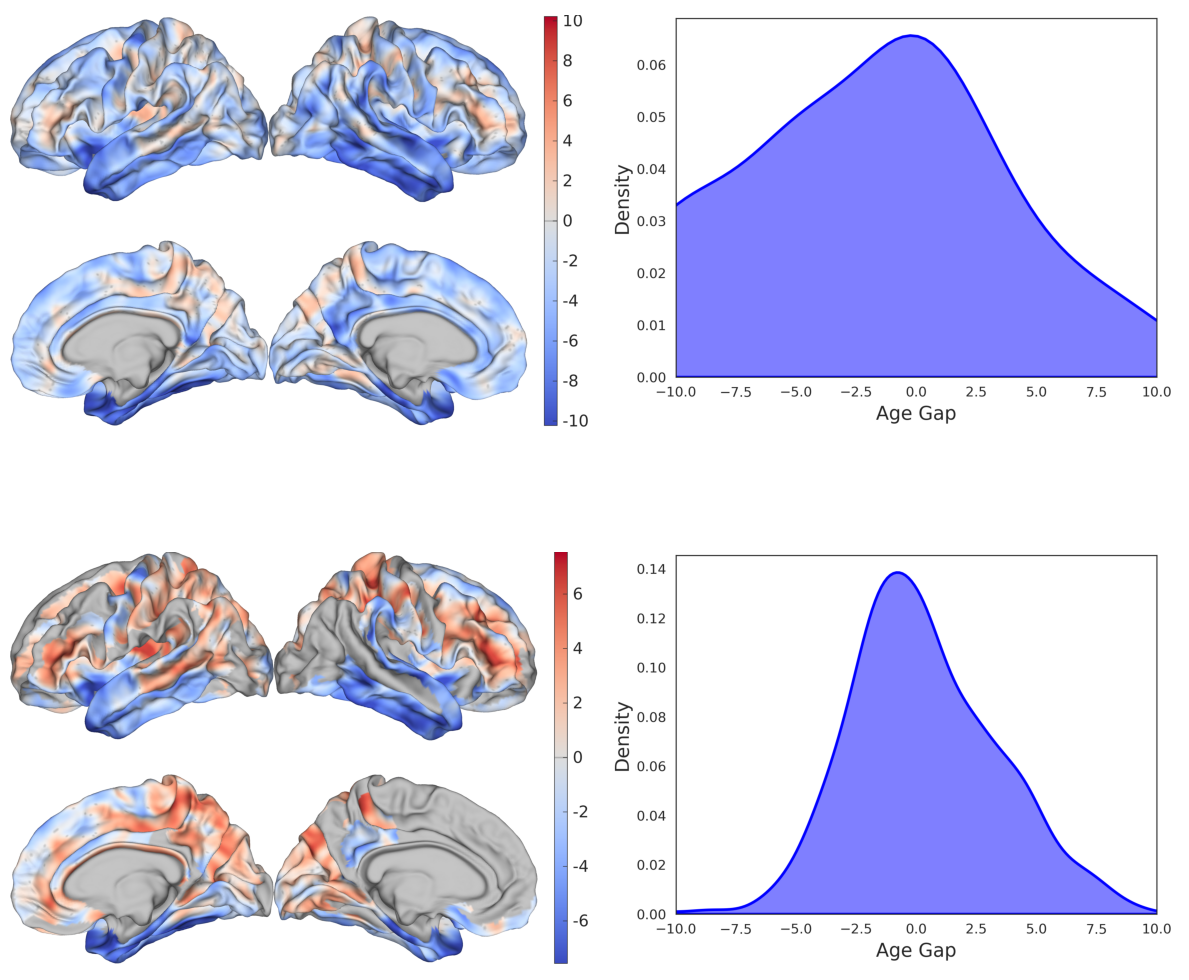

In [3]:
suffix='test_m'
test_model(X_test_CN, y_test_CN, 
           model=trained_model, 
           mask=np.load(f'{data_dir}sex_ADNI_CN.npy') == 'Male', 
           suffix=suffix, test_size=1)
postprocess_model(suffix, factors=np.load(f'{output_dir}test_CN_factors.npy'), global_limits=10)

Females

MAE (L1) Loss: 7.556 across 570 observations
Variance and MAE Loss: 104.852 across 570 observations


Saved Figure: /mnt/md0/tempFolder/samAnderson/gnn_model/unet-gnn/last_model_outputs/test_f_raw_age_gaps.png
Figure stats: mean = -1.1932747045560184 ; median = -1.2354406908366755 ; std = 6.078689884601369 ; var = 36.950470713155
Saved Figure: /mnt/md0/tempFolder/samAnderson/gnn_model/unet-gnn/last_model_outputs/test_f_corrected_age_gaps.png
Figure stats: mean = -0.3252738040197826 ; median = -0.6546871120508087 ; std = 2.878395647908045 ; var = 8.285161505895973

Top 10 significant age gaps:

               region hemi       age_gap variance  skew  region_avg     adj_pval
       G_temporal_inf   rh -6.77 (-7.64)    86.79  0.09       -5.06 1.678566e-40
        Pole_temporal   rh -6.68 (-7.55)    84.44  0.12       -6.42 1.725057e-40
G_oc-temp_lat-fusifor   rh -6.54 (-7.40)    82.76  0.02       -4.38 2.358618e-39
        Pole_temporal   lh -6.16 (-7.03)    78.41  0.09       -6.42 4.12847

<Figure size 640x480 with 0 Axes>

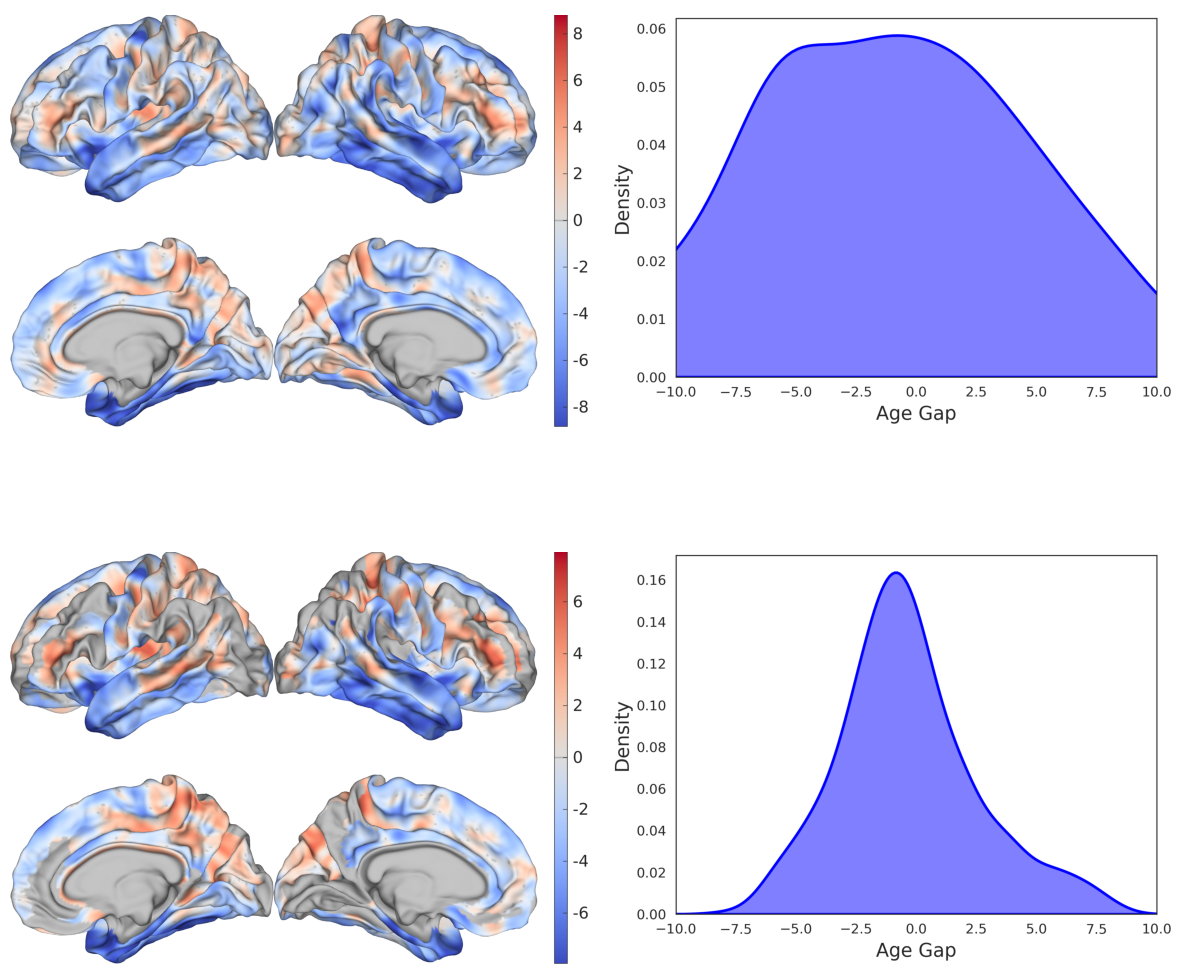

In [4]:
suffix='test_f'
test_model(X_test_CN, y_test_CN, 
           model=trained_model, 
           mask=np.load(f'{data_dir}sex_ADNI_CN.npy') == 'Female', 
           suffix=suffix, test_size=1)
postprocess_model(suffix, factors=np.load(f'{output_dir}test_CN_factors.npy'), global_limits=10)

View L-BAG difference for males and females

Significant (p = 0.00) differences in CA distribution across cohorts detected, performing bootstrapping...

Top 10 significant age gaps:

       region hemi   age_gap    t_stat  raw_pval  region_avg  adj_pval  significant
Pole_temporal   rh -0.254422 -3.826966  0.000138   -0.250273  0.020708            1


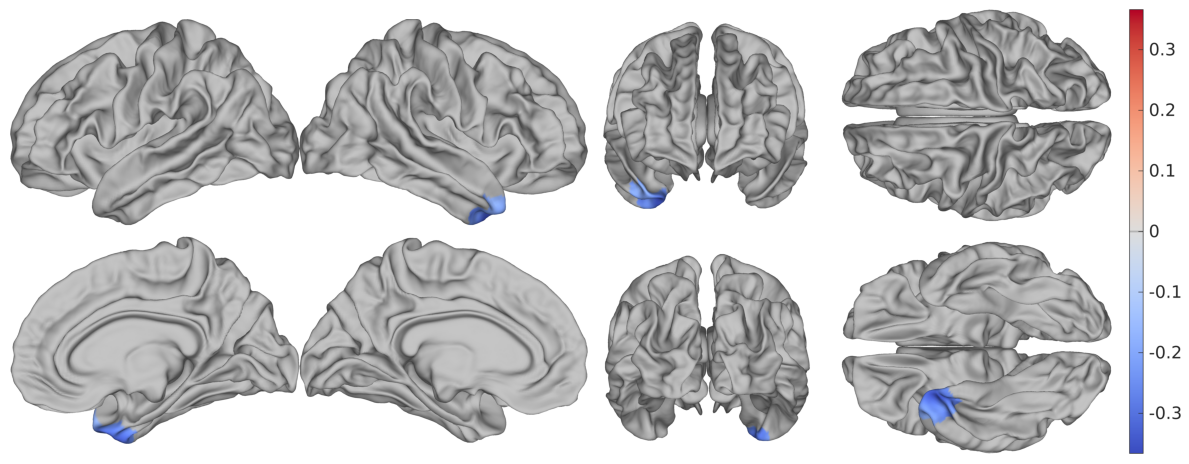

In [4]:
pred_MEs_pruned, ref_MEs_pruned = compare_cohorts(suffix='f-m', cohort_pred='test_CN', cohort_ref='test_CN', # pred - ref
                                                  mask = np.load(f'{data_dir}sex_ADNI_CN.npy'), 
                                                  mask_split={'pred' : 'Female', 'ref' : 'Male'})

Display the age gaps of the Male and Female sets (pruned for CA matching)

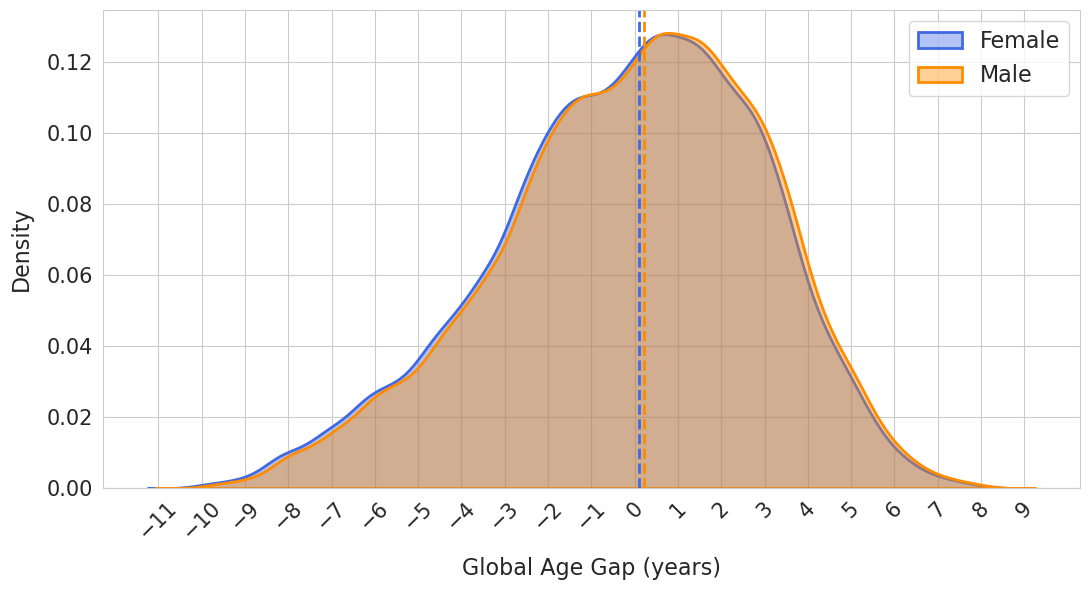

In [ ]:
compare_age_gaps(pred_MEs_pruned, 'Female', ref_MEs_pruned, 'Male', x_step=1)
plt.savefig(f'{output_dir}f_m_AGs.png')

Get the region stats, including average age gap, for CNs, ADs, and AD-CNs

In [33]:
print('\n\nFemales\n')
show_ranked_differences(suffix='test_f', output_dir=output_dir)
print('\n\nMales\n')
show_ranked_differences(suffix='test_m', output_dir=output_dir)
print('\n\nFemales-Males\n')
show_ranked_differences(suffix='f-m', output_dir=output_dir)



Females


All regions ranked by average age gap:
Region                               Avg Gap   LH Gap   RH Gap
-------------------------------------------------------------------------------------
S_postcentral                           2.75     2.44     3.06 
S_intrapariet_and_P_trans               2.68     2.97     2.39 
S_circular_insula_sup                   2.38     3.00     1.77 
S_front_inf                             2.37     1.71     3.03 
S_orbital_lateral                       2.23     2.38     2.08 
S_cingul-Marginalis                     2.13     1.64     2.62 
S_central                               2.12     2.57     1.68 
S_front_middle                          2.04     1.03     3.06 
Lat_Fis-ant-Horizont                    2.01     2.21     1.81 
S_parieto_occipital                     1.55     1.02     2.08 
Lat_Fis-ant-Vertical                    1.55     2.11     0.99 
S_oc_sup_and_transversal                1.48     1.41     1.56 
G_cuneus                        